In [1]:
import os 
from pathlib import Path

In [2]:
image_path = Path('data')

#### Inspecting what's in the data directory

In [3]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:

walk_through_dir(image_path)

There are 3 directories and 0 images in 'data'.
There are 58 directories and 0 images in 'data/devnagari'.
There are 0 directories and 205 images in 'data/devnagari/ka'.
There are 0 directories and 205 images in 'data/devnagari/yna'.
There are 0 directories and 205 images in 'data/devnagari/la'.
There are 0 directories and 288 images in 'data/devnagari/7'.
There are 0 directories and 205 images in 'data/devnagari/cha'.
There are 0 directories and 205 images in 'data/devnagari/jha'.
There are 0 directories and 288 images in 'data/devnagari/8'.
There are 0 directories and 288 images in 'data/devnagari/4'.
There are 0 directories and 205 images in 'data/devnagari/ana'.
There are 0 directories and 205 images in 'data/devnagari/bha'.
There are 0 directories and 205 images in 'data/devnagari/va'.
There are 0 directories and 288 images in 'data/devnagari/9'.
There are 0 directories and 205 images in 'data/devnagari/ga'.
There are 0 directories and 205 images in 'data/devnagari/kha'.
There are

#### Setup train and testing paths

In [174]:

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/train'), PosixPath('data/test'))

#### Visulaize the image

- getting all the image paths using glob()
- picking random image path
- getting image name using parent.stem
- Using PIL.Image.open() to open the random image
- printing out image, imageclass, height and width

In [239]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))


random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem


img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

Random image path: data/train/ae/018_07.jpg
Image class: ae
Image height: 28
Image width: 28


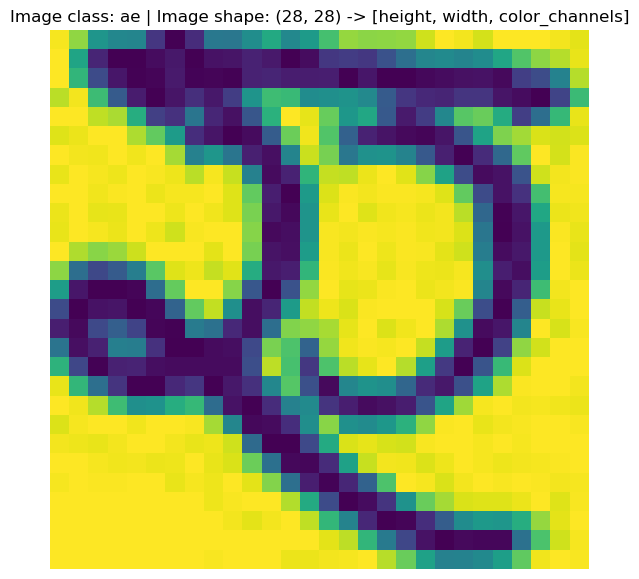

In [176]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

#### Transforming Data

- Turning the imge data into tensors
- Turn it into a Dataset and then to DataLoader

In [177]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

- resizing to 64,64 to ensure all imput images have same dimensions
- random horizontal flip for data augementation 
- Converting images to Tensors


In [178]:

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() 
])

- Plotting the transformed image

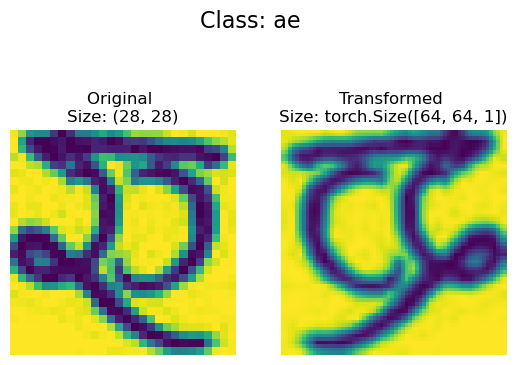

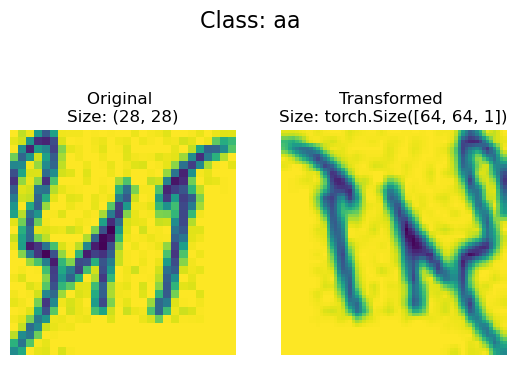

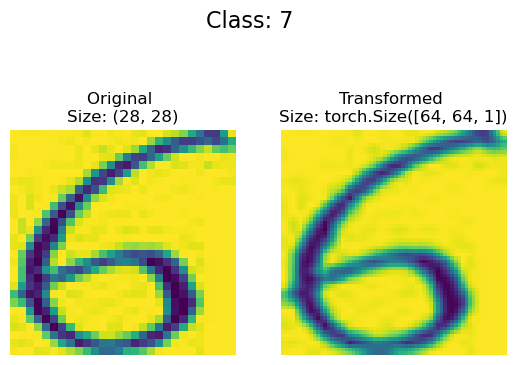

In [179]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

- Converting image data into a Dataset

In [180]:

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None) 

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 10316
    Root location: data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2596
    Root location: data/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [181]:
# # Get class names as a list
class_names = train_data.classes
class_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'aa',
 'ae',
 'ah',
 'ai',
 'an',
 'ana',
 'au',
 'ba',
 'bha',
 'cha',
 'chha',
 'da',
 'daa',
 'dha',
 'dhaa',
 'ee',
 'ga',
 'gha',
 'gya',
 'ha',
 'i',
 'ja',
 'jha',
 'ka',
 'kha',
 'kna',
 'ksha',
 'la',
 'ma',
 'motosaw',
 'na',
 'o',
 'oo',
 'pa',
 'patalosaw',
 'petchiryosaw',
 'pha',
 'ra',
 'ta',
 'taa',
 'tha',
 'thaa',
 'tra',
 'u',
 'va',
 'ya',
 'yna']

In [182]:
# # Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'aa': 11,
 'ae': 12,
 'ah': 13,
 'ai': 14,
 'an': 15,
 'ana': 16,
 'au': 17,
 'ba': 18,
 'bha': 19,
 'cha': 20,
 'chha': 21,
 'da': 22,
 'daa': 23,
 'dha': 24,
 'dhaa': 25,
 'ee': 26,
 'ga': 27,
 'gha': 28,
 'gya': 29,
 'ha': 30,
 'i': 31,
 'ja': 32,
 'jha': 33,
 'ka': 34,
 'kha': 35,
 'kna': 36,
 'ksha': 37,
 'la': 38,
 'ma': 39,
 'motosaw': 40,
 'na': 41,
 'o': 42,
 'oo': 43,
 'pa': 44,
 'patalosaw': 45,
 'petchiryosaw': 46,
 'pha': 47,
 'ra': 48,
 'ta': 49,
 'taa': 50,
 'tha': 51,
 'thaa': 52,
 'tra': 53,
 'u': 54,
 'va': 55,
 'ya': 56,
 'yna': 57}

In [183]:

len(train_data), len(test_data)

(10316, 2596)

In [184]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9922, 0.9922, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9608, 0.9647, 0.9804,  ..., 0.9882, 0.9882, 0.9843],
         ...,
         [0.9922, 0.9922, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
         [0.9843, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
         [0.9804, 0.9843, 0.9882,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9922, 0.9922, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9608, 0.9647, 0.9804,  ..., 0.9882, 0.9882, 0.9843],
         ...,
         [0.9922, 0.9922, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
         [0.9843, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
         [0.9804, 0.9843, 0.9882,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9922, 0.9922, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9804, 0.9843, 0.9843],
         [0.9608, 0.9647, 0.9804,  ..., 0.98

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


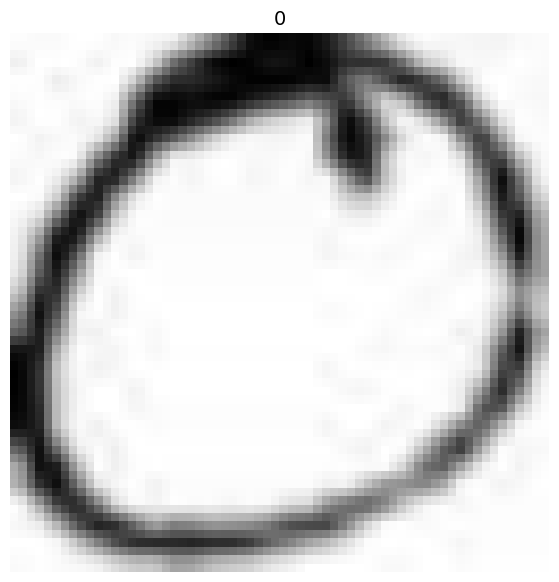

In [185]:

img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### Converting to dataloader

In [186]:

from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, 
                              num_workers=1,
                              shuffle=True) 

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x72ec40683150>,
 <torch.utils.data.dataloader.DataLoader at 0x72ec0aa74790>)

In [187]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


#### Loading Image Data with a Custom Dataset

In [188]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [189]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  'a',
  'aa',
  'ae',
  'ah',
  'ai',
  'an',
  'ana',
  'au',
  'ba',
  'bha',
  'cha',
  'chha',
  'da',
  'daa',
  'dha',
  'dhaa',
  'ee',
  'ga',
  'gha',
  'gya',
  'ha',
  'i',
  'ja',
  'jha',
  'ka',
  'kha',
  'kna',
  'ksha',
  'la',
  'ma',
  'motosaw',
  'na',
  'o',
  'oo',
  'pa',
  'patalosaw',
  'petchiryosaw',
  'pha',
  'ra',
  'ta',
  'taa',
  'tha',
  'thaa',
  'tra',
  'u',
  'va',
  'ya',
  'yna'],
 {'0': 0,
  '1': 1,
  '2': 2,
  '3': 3,
  '4': 4,
  '5': 5,
  '6': 6,
  '7': 7,
  '8': 8,
  '9': 9,
  'a': 10,
  'aa': 11,
  'ae': 12,
  'ah': 13,
  'ai': 14,
  'an': 15,
  'ana': 16,
  'au': 17,
  'ba': 18,
  'bha': 19,
  'cha': 20,
  'chha': 21,
  'da': 22,
  'daa': 23,
  'dha': 24,
  'dhaa': 25,
  'ee': 26,
  'ga': 27,
  'gha': 28,
  'gya': 29,
  'ha': 30,
  'i': 31,
  'ja': 32,
  'jha': 33,
  'ka': 34,
  'kha': 35,
  'kna': 36,
  'ksha': 37,
  'la': 38,
  'ma': 39,
  'motosaw': 40,
  'na': 41,
 

In [190]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/train
Class names found: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'ae', 'ah', 'ai', 'an', 'ana', 'au', 'ba', 'bha', 'cha', 'chha', 'da', 'daa', 'dha', 'dhaa', 'ee', 'ga', 'gha', 'gya', 'ha', 'i', 'ja', 'jha', 'ka', 'kha', 'kna', 'ksha', 'la', 'ma', 'motosaw', 'na', 'o', 'oo', 'pa', 'patalosaw', 'petchiryosaw', 'pha', 'ra', 'ta', 'taa', 'tha', 'thaa', 'tra', 'u', 'va', 'ya', 'yna']


In [1]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
   
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

NameError: name 'Tuple' is not defined

In [192]:
find_classes(train_dir)

(['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  'a',
  'aa',
  'ae',
  'ah',
  'ai',
  'an',
  'ana',
  'au',
  'ba',
  'bha',
  'cha',
  'chha',
  'da',
  'daa',
  'dha',
  'dhaa',
  'ee',
  'ga',
  'gha',
  'gya',
  'ha',
  'i',
  'ja',
  'jha',
  'ka',
  'kha',
  'kna',
  'ksha',
  'la',
  'ma',
  'motosaw',
  'na',
  'o',
  'oo',
  'pa',
  'patalosaw',
  'petchiryosaw',
  'pha',
  'ra',
  'ta',
  'taa',
  'tha',
  'thaa',
  'tra',
  'u',
  'va',
  'ya',
  'yna'],
 {'0': 0,
  '1': 1,
  '2': 2,
  '3': 3,
  '4': 4,
  '5': 5,
  '6': 6,
  '7': 7,
  '8': 8,
  '9': 9,
  'a': 10,
  'aa': 11,
  'ae': 12,
  'ah': 13,
  'ai': 14,
  'an': 15,
  'ana': 16,
  'au': 17,
  'ba': 18,
  'bha': 19,
  'cha': 20,
  'chha': 21,
  'da': 22,
  'daa': 23,
  'dha': 24,
  'dhaa': 25,
  'ee': 26,
  'ga': 27,
  'gha': 28,
  'gya': 29,
  'ha': 30,
  'i': 31,
  'ja': 32,
  'jha': 33,
  'ka': 34,
  'kha': 35,
  'kna': 36,
  'ksha': 37,
  'la': 38,
  'ma': 39,
  'motosaw': 40,
  'na': 41,
 

In [193]:

from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx 
        else:
            return img, class_idx

In [194]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [195]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x72ec0abf8d10>,
 <__main__.ImageFolderCustom at 0x72ec1ac9a9d0>)

In [196]:
len(train_data_custom), len(test_data_custom)

(10316, 2596)

In [197]:
train_data_custom.classes


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'aa',
 'ae',
 'ah',
 'ai',
 'an',
 'ana',
 'au',
 'ba',
 'bha',
 'cha',
 'chha',
 'da',
 'daa',
 'dha',
 'dhaa',
 'ee',
 'ga',
 'gha',
 'gya',
 'ha',
 'i',
 'ja',
 'jha',
 'ka',
 'kha',
 'kna',
 'ksha',
 'la',
 'ma',
 'motosaw',
 'na',
 'o',
 'oo',
 'pa',
 'patalosaw',
 'petchiryosaw',
 'pha',
 'ra',
 'ta',
 'taa',
 'tha',
 'thaa',
 'tra',
 'u',
 'va',
 'ya',
 'yna']

In [198]:
train_data_custom.class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'aa': 11,
 'ae': 12,
 'ah': 13,
 'ai': 14,
 'an': 15,
 'ana': 16,
 'au': 17,
 'ba': 18,
 'bha': 19,
 'cha': 20,
 'chha': 21,
 'da': 22,
 'daa': 23,
 'dha': 24,
 'dhaa': 25,
 'ee': 26,
 'ga': 27,
 'gha': 28,
 'gya': 29,
 'ha': 30,
 'i': 31,
 'ja': 32,
 'jha': 33,
 'ka': 34,
 'kha': 35,
 'kna': 36,
 'ksha': 37,
 'la': 38,
 'ma': 39,
 'motosaw': 40,
 'na': 41,
 'o': 42,
 'oo': 43,
 'pa': 44,
 'patalosaw': 45,
 'petchiryosaw': 46,
 'pha': 47,
 'ra': 48,
 'ta': 49,
 'taa': 50,
 'tha': 51,
 'thaa': 52,
 'tra': 53,
 'u': 54,
 'va': 55,
 'ya': 56,
 'yna': 57}

In [199]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [200]:

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

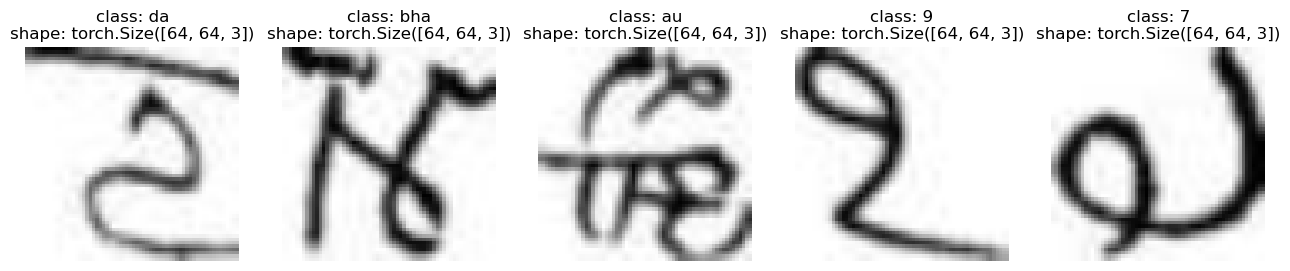

In [201]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


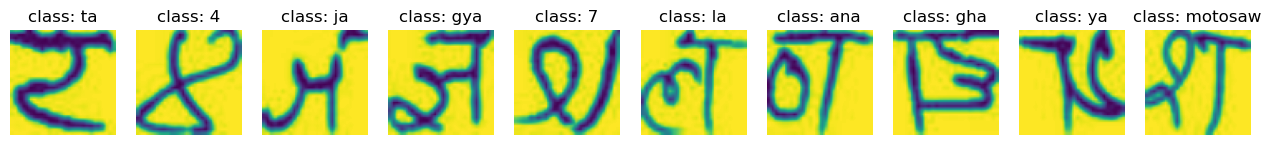

In [202]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

Turning custom loaded images into DataLoader's

In [203]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x72ec0a9377d0>,
 <torch.utils.data.dataloader.DataLoader at 0x72ec0a9e2490>)

In [204]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 1, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


Other forms of transforms 
 - TrivialAugment

In [205]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), 
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((28, 28)), 
    transforms.ToTensor()
])

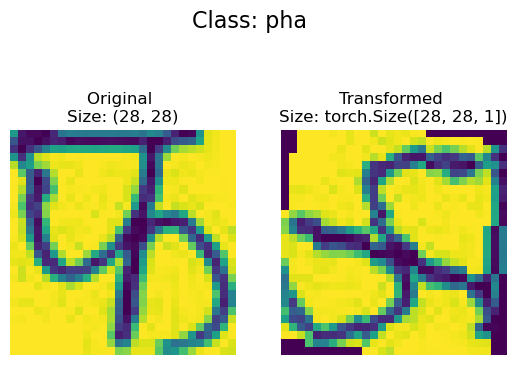

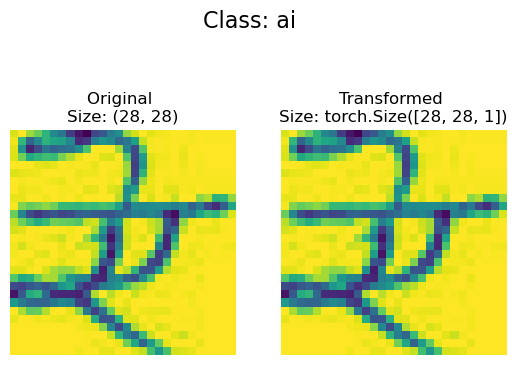

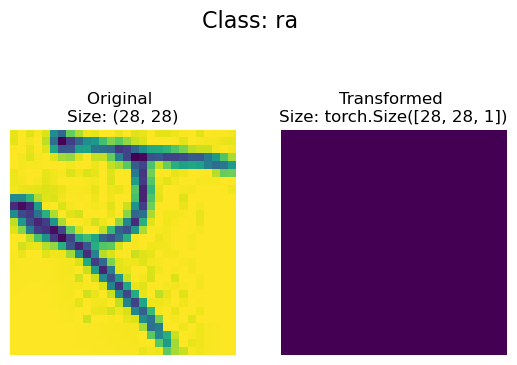

In [206]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

#### Model 0: TinyVGG without data augmentation¶

In [ ]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:

from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 8 workers.


(<torch.utils.data.dataloader.DataLoader at 0x72ec0a839310>,
 <torch.utils.data.dataloader.DataLoader at 0x72ec1ad15110>)

#### Create TinyVGG model class

In [ ]:
import torch
import torch.nn as nn


In [210]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=58, bias=True)
  )
)

In [243]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 30

model_1 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data_custom.classes))


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3705 | train_acc: 0.3951 | test_loss: 1.2022 | test_acc: 0.6589
Epoch: 2 | train_loss: 0.7998 | train_acc: 0.7778 | test_loss: 0.7241 | test_acc: 0.7965
Epoch: 3 | train_loss: 0.4004 | train_acc: 0.8837 | test_loss: 0.6651 | test_acc: 0.8152
Epoch: 4 | train_loss: 0.2042 | train_acc: 0.9377 | test_loss: 0.7385 | test_acc: 0.8243
Epoch: 5 | train_loss: 0.1136 | train_acc: 0.9634 | test_loss: 0.8520 | test_acc: 0.8205
Epoch: 6 | train_loss: 0.0619 | train_acc: 0.9815 | test_loss: 0.9145 | test_acc: 0.8258
Epoch: 7 | train_loss: 0.0584 | train_acc: 0.9796 | test_loss: 1.0512 | test_acc: 0.8133
Epoch: 8 | train_loss: 0.0427 | train_acc: 0.9860 | test_loss: 1.1598 | test_acc: 0.8243
Epoch: 9 | train_loss: 0.0382 | train_acc: 0.9874 | test_loss: 1.0859 | test_acc: 0.8190
Epoch: 10 | train_loss: 0.0199 | train_acc: 0.9935 | test_loss: 1.2809 | test_acc: 0.8209
Epoch: 11 | train_loss: 0.0405 | train_acc: 0.9865 | test_loss: 1.4707 | test_acc: 0.7828
Epoch: 12 | train_l

In [211]:
img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single)
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0589,  0.0499,  0.0204, -0.0180, -0.0401,  0.0696, -0.0602,  0.0995,
          0.0038,  0.0808, -0.0132, -0.0292,  0.0133, -0.0353,  0.0686,  0.0064,
          0.0225,  0.0240,  0.0023,  0.0478, -0.0167, -0.0240,  0.0217,  0.0070,
          0.0261,  0.0977,  0.0221,  0.0680,  0.0025, -0.0566,  0.0069,  0.0854,
          0.0267, -0.0953, -0.0132, -0.0211, -0.0147, -0.0277,  0.0300, -0.0045,
          0.0391, -0.0254,  0.0218,  0.0662, -0.0590,  0.0129,  0.0663,  0.0789,
          0.0585,  0.0352, -0.0011, -0.0415, -0.0195,  0.0423,  0.0099, -0.0243,
         -0.0141,  0.0437]])

Output prediction probabilities:
tensor([[0.0180, 0.0179, 0.0173, 0.0167, 0.0163, 0.0182, 0.0160, 0.0188, 0.0171,
         0.0184, 0.0168, 0.0165, 0.0172, 0.0164, 0.0182, 0.0171, 0.0174, 0.0174,
         0.0170, 0.0178, 0.0167, 0.0166, 0.0174, 0.0171, 0.0174, 0.0187, 0.0174,
         0.0182, 0.0170, 0.0161, 0.0171, 0.0185, 0.0175, 0.0155,

In [212]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 58]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [213]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X, y

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [214]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):

    model.eval() 
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X, y
    
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [215]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [216]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data_custom.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3705 | train_acc: 0.3951 | test_loss: 1.2022 | test_acc: 0.6589
Epoch: 2 | train_loss: 0.7998 | train_acc: 0.7778 | test_loss: 0.7241 | test_acc: 0.7965
Epoch: 3 | train_loss: 0.4004 | train_acc: 0.8837 | test_loss: 0.6651 | test_acc: 0.8152
Epoch: 4 | train_loss: 0.2042 | train_acc: 0.9377 | test_loss: 0.7385 | test_acc: 0.8243
Epoch: 5 | train_loss: 0.1136 | train_acc: 0.9634 | test_loss: 0.8520 | test_acc: 0.8205
Total training time: 170.166 seconds


In [217]:
# # Set random seeds
# torch.manual_seed(42) 
# torch.cuda.manual_seed(42)

# # Set number of epochs
# NUM_EPOCHS = 10

# # Recreate an instance of TinyVGG
# model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
#                   hidden_units=10, 
#                   output_shape=len(train_data_custom.classes))

# # Setup loss function and optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# # Start the timer
# from timeit import default_timer as timer 
# start_time = timer()

# # Train model_0 
# model_0_results = train(model=model_0, 
#                         train_dataloader=train_dataloader_simple,
#                         test_dataloader=test_dataloader_simple,
#                         optimizer=optimizer,
#                         loss_fn=loss_fn, 
#                         epochs=NUM_EPOCHS)

# # End the timer and print out how long it took
# end_time = timer()
# print(f"Total training time: {end_time-start_time:.3f} seconds")

In [218]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [219]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

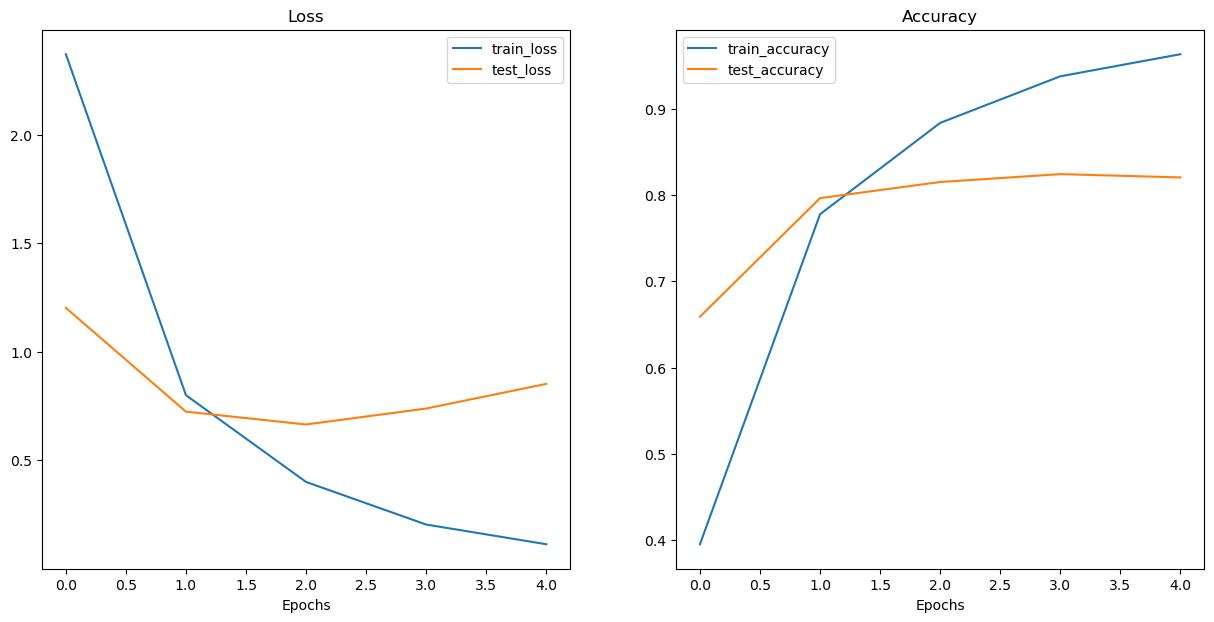

In [220]:
plot_loss_curves(model_0_results)

In [221]:
# import joblib
# joblib.dump(model, 'model0.joblib')

In [222]:
model = model_0

# Save the model architecture
torch.save(model, 'model_0.pth')

### Model with data augmentation

In [224]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [225]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 10316
     Root location: data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2596
     Root location: data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [226]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x72ec40511290>,
 <torch.utils.data.dataloader.DataLoader at 0x72ec0aa74790>)

In [244]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=58, bias=True)
  )
)

In [246]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3557 | train_acc: 0.7061 | test_loss: 0.5933 | test_acc: 0.8346
Epoch: 2 | train_loss: 1.3321 | train_acc: 0.7098 | test_loss: 0.5766 | test_acc: 0.8365
Epoch: 3 | train_loss: 1.3182 | train_acc: 0.7108 | test_loss: 0.6333 | test_acc: 0.8308
Epoch: 4 | train_loss: 1.3100 | train_acc: 0.7106 | test_loss: 0.5831 | test_acc: 0.8384
Epoch: 5 | train_loss: 1.3102 | train_acc: 0.7121 | test_loss: 0.5545 | test_acc: 0.8495
Epoch: 6 | train_loss: 1.2407 | train_acc: 0.7253 | test_loss: 0.5761 | test_acc: 0.8388
Epoch: 7 | train_loss: 1.2587 | train_acc: 0.7239 | test_loss: 0.5997 | test_acc: 0.8342
Epoch: 8 | train_loss: 1.2391 | train_acc: 0.7257 | test_loss: 0.5630 | test_acc: 0.8438
Epoch: 9 | train_loss: 1.1848 | train_acc: 0.7363 | test_loss: 0.5827 | test_acc: 0.8453
Epoch: 10 | train_loss: 1.1829 | train_acc: 0.7390 | test_loss: 0.5564 | test_acc: 0.8483
Epoch: 11 | train_loss: 1.1726 | train_acc: 0.7384 | test_loss: 0.5132 | test_acc: 0.8476
Epoch: 12 | train_l

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
img, label = dev_data[0]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9922, 0.9922],
         [0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9882, 0.9882,  ..., 0.9804, 0.9647, 0.9608],
         ...,
         [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9922, 0.9922],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9843],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9843, 0.9804]],

        [[0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9922, 0.9922],
         [0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9882, 0.9882,  ..., 0.9804, 0.9647, 0.9608],
         ...,
         [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9922, 0.9922],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9843],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9843, 0.9804]],

        [[0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9922, 0.9922],
         [0.9843, 0.9843, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9882, 0.9882,  ..., 0.98